# Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Train set

## Análisis inicial

In [3]:
# ¿Qué columnas tiene?
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# ¿Cuántas filas y columnas?
train.shape

(891, 12)

In [5]:
# ¿Valores nulos?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Faltan datos algunos datos en Age, muchísimos en Cabin y unos pocos en Embarked.

In [6]:
# ¿Cómo se distribuyen las variables numéricas?
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# ¿Cómo se comportan las variables categóricas?
train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Análisis de sobrevivientes

In [8]:
# ¿Cuántos sobrevivieron?
train.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [9]:
# ¿Cuántos hombre y mujeres sobrevivieron?
train.groupby(['Survived', 'Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

In [10]:
# Tabla de doble entrada
sur_sex = train.groupby(['Survived', 'Sex']).count()['PassengerId']
sur_sex.unstack(level = 0)

Survived,0,1
Sex,,
female,81,233
male,468,109


<AxesSubplot:xlabel='Sex'>

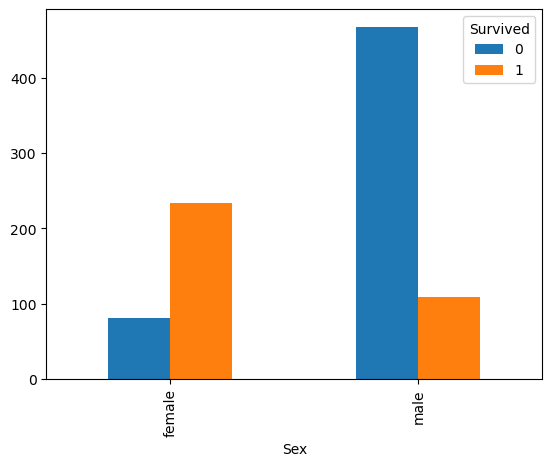

In [11]:
# Gráfico de barras
(sur_sex.unstack(level = 0).plot.bar())

Sobrevivieron muchas más mujeres que hombres.

<AxesSubplot:xlabel='Embarked'>

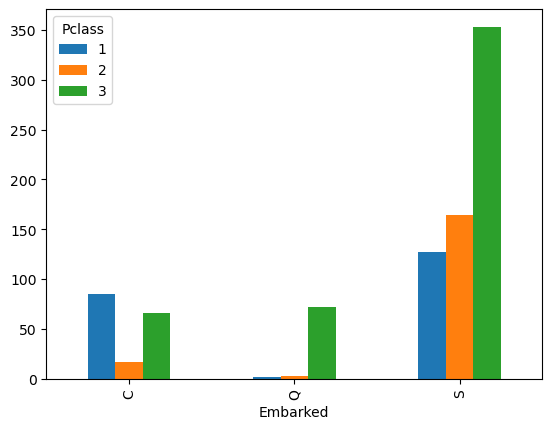

In [12]:
# Relación de la clase y el lugar donde se embarcó
train.groupby(['Pclass', 'Embarked']).count()['PassengerId'].unstack(level = 0).plot.bar()

La mayoría de personas de tercera clase se embarcaron en el S, pero no es demasiado relevante para el análisis.

## Procesamiento de datos

In [13]:
# Tres filas de las variables de interés
train[['Survived', 'Age', 'Sex', 'Pclass']].head(3)

,Survived,Age,Sex,Pclass
0,0,22.0,male,3
1,1,38.0,female,1
2,1,26.0,female,3


In [14]:
# Tipos de datos y nulos
train[['Survived', 'Age', 'Sex', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Sex       891 non-null    object 
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


Tenemos que mejorar
- Datos faltantes en Age
- Tener la variable Sex como numérica

In [15]:
# Mirar cómo se distribuyen los nulos en Edad según Sexo y Clase
(train[train['Age'].isna()]
.groupby(['Sex', 'Pclass'])
.count()['PassengerId']
.unstack(level = 0))

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


La mayoría de valores faltantes están dados por hombres de tercera clase.

In [16]:
# Mirar cómo se distribuyen los nulos en Edad según "Hermanos o Cónyuges a bordo" y "Familiares a Bordo"
(train[train['Age'].isna()]
.groupby(['SibSp', 'Parch'])
.count()['PassengerId']
.unstack(level = 0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


La mayoría de valores faltantes están dados por personas que viajaban solas.

In [17]:
# Consideremos imputar con la mediana de la Edad
train['Age'].median()

28.0

Se puede considerar la edad de 28 años para completar los valores faltantes, ya que encaja con la descripción de hombres que viajan solos.

In [18]:
# Imputar valores
train['Age'] = train['Age'].fillna(28.0)
train[['Survived', 'Age', 'Sex', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   Sex       891 non-null    object 
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [19]:
# Cambiar tipo de objeto de Sexo
train['Sex'] = train['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [20]:
train[['Survived', 'Age', 'Sex', 'Pclass']].head(3)

,Survived,Age,Sex,Pclass
0,0,22.0,0,3
1,1,38.0,1,1
2,1,26.0,1,3


In [21]:
# Crear variable tipo flag (Persona que viaja sola)
train['Alone'] = np.where((train['SibSp'] == 0) & (train['Parch'] == 0), 1, 0)

In [22]:
# Sobrevivientes que viajaron solos
grouped_alone = train.groupby(['Survived', 'Alone']).count()['PassengerId']
grouped_alone

Survived  Alone
0         0        175
          1        374
1         0        179
          1        163
Name: PassengerId, dtype: int64

<AxesSubplot:xlabel='Alone'>

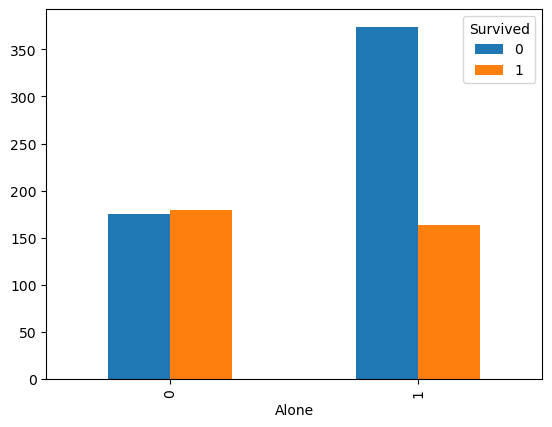

In [23]:
(grouped_alone.unstack(level = 0).plot.bar())

In [24]:
# Tabla actual
train[['Survived', 'Age', 'Sex', 'Pclass', 'Alone']].head(3)

,Survived,Age,Sex,Pclass,Alone
0,0,22.0,0,3,0
1,1,38.0,1,1,0
2,1,26.0,1,3,1


# Modelos

## Creación de los modelos

In [25]:
# Variable dependiente
y_train = train['Survived']

# Variables explicativas
features = ['Age', 'Sex', 'Pclass', 'Alone']
x_train = train[features]

print(y_train.shape, x_train.shape)

(891,) (891, 4)


### Regresión logística

Análisis de clasificación utilizado para predecir el resultado de una variable categórica en función de las variables independientes o predictoras.

In [26]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

### Árboles de decisión

Modelo utilizado para analizar datos cuantitativos y tomar una decisión basada en números.

In [27]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

## Evaluación

In [28]:
# Función de Matriz de Confusión

def conf_mat (modelo):
    disp = plot_confusion_matrix(modelo, x_train, y_train, cmap = plt.cm.Blues, values_format = "d")
    true_pred = disp.confusion_matrix[0, 0] + disp.confusion_matrix[1, 1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred / total_data
    print('accuracy:', np.round(accuracy, 2))
    plt.show()

accuracy: 0.79


C:\Users\Valentina\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


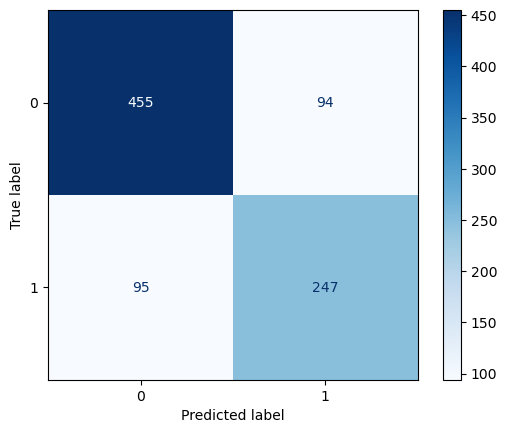

In [29]:
conf_mat(logreg)

### Árboles de decisión

accuracy: 0.89


C:\Users\Valentina\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


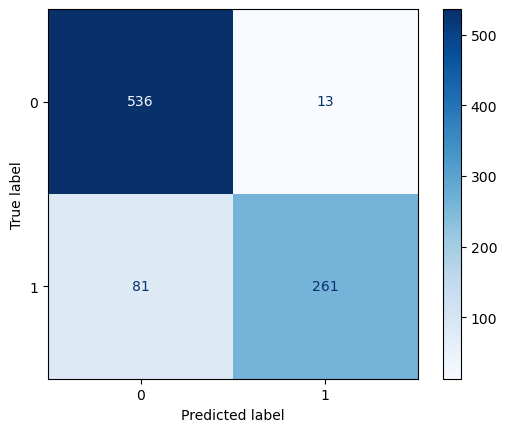

In [30]:
conf_mat(decision_tree)

# Test set

Veamos qué tan acertados son los modelos predictivos para evaluar si una persona sobrevivie o no, utilizando el conjunto de datos de testeo.

In [31]:
# Los mismos datos pero sin la variable de sobrevivencia
print(test.head(3))
test.info()

   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 no

In [32]:
# Procesamiento de datos
test['Sex'] = test['Sex'].map({'female': 1, 'male': 0}).astype(int)
test['Age'] = test['Age'].fillna(28.0)
test['Alone'] = np.where((test['SibSp'] == 0) & (test['Parch'] == 0), 1, 0)

In [33]:
# Tabla final
test[['Age', 'Sex', 'Pclass', 'Alone']].head(3)

,Age,Sex,Pclass,Alone
0,34.5,0,3,1
1,47.0,1,3,0
2,62.0,0,2,1


In [40]:
# Variables explicativas
x_test = test[features]
x_test

,Age,Sex,Pclass,Alone
0,34.5,0,3,1
1,47.0,1,3,0
2,62.0,0,2,1
3,27.0,0,3,1
4,22.0,1,3,0
...,...,...,...,...
413,28.0,0,3,1
414,39.0,1,1,1
415,38.5,0,3,1
416,28.0,0,3,1


## Predicción

### Regresión logística

In [41]:
y_pred_log = logreg.predict(x_test)
print(y_pred_log[0:20])

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0]


### Árboles de decisión

In [42]:
y_pred_tree = decision_tree.predict(x_test)
print(y_pred_tree[0:20])

[0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0]


In [43]:
# Función para descargar en csv
def down_csv (y_pred, name):
    output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
    output.to_csv(name, index = False)

In [44]:
# Guardar ambas predicciones
down_csv(y_pred_log, 'pred_log.csv')
down_csv(y_pred_tree, 'pred_tree.csv')